The Iris Flower Classification is a classic machine learning problem that involves classifying iris flowers into three species based on their features. This is a supervised learning task using a dataset collected by Ronald Fisher in 1936.

Dataset Overview :

The Iris dataset contains 150 samples with the following four features:

Sepal Length (cm)

Sepal Width (cm) 

Petal Length (cm)

Petal Width (cm)

Each sample is classified into one of the three species:

Setosa

Versicolor

Virginica


# 1. Import Necessary Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


df.info()

In [8]:
df.shape

(150, 5)

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

<Axes: xlabel='species', ylabel='count'>

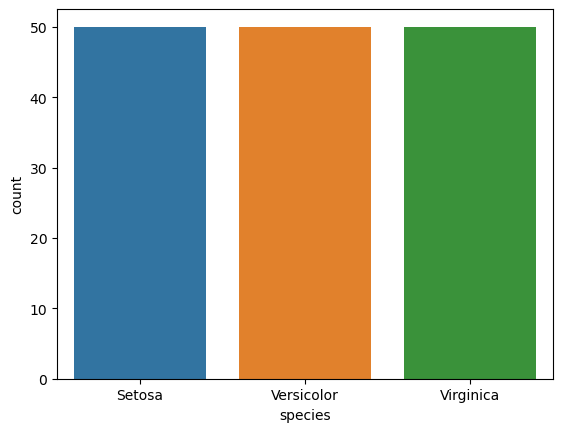

In [11]:
sns.countplot(x=df["species"])

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


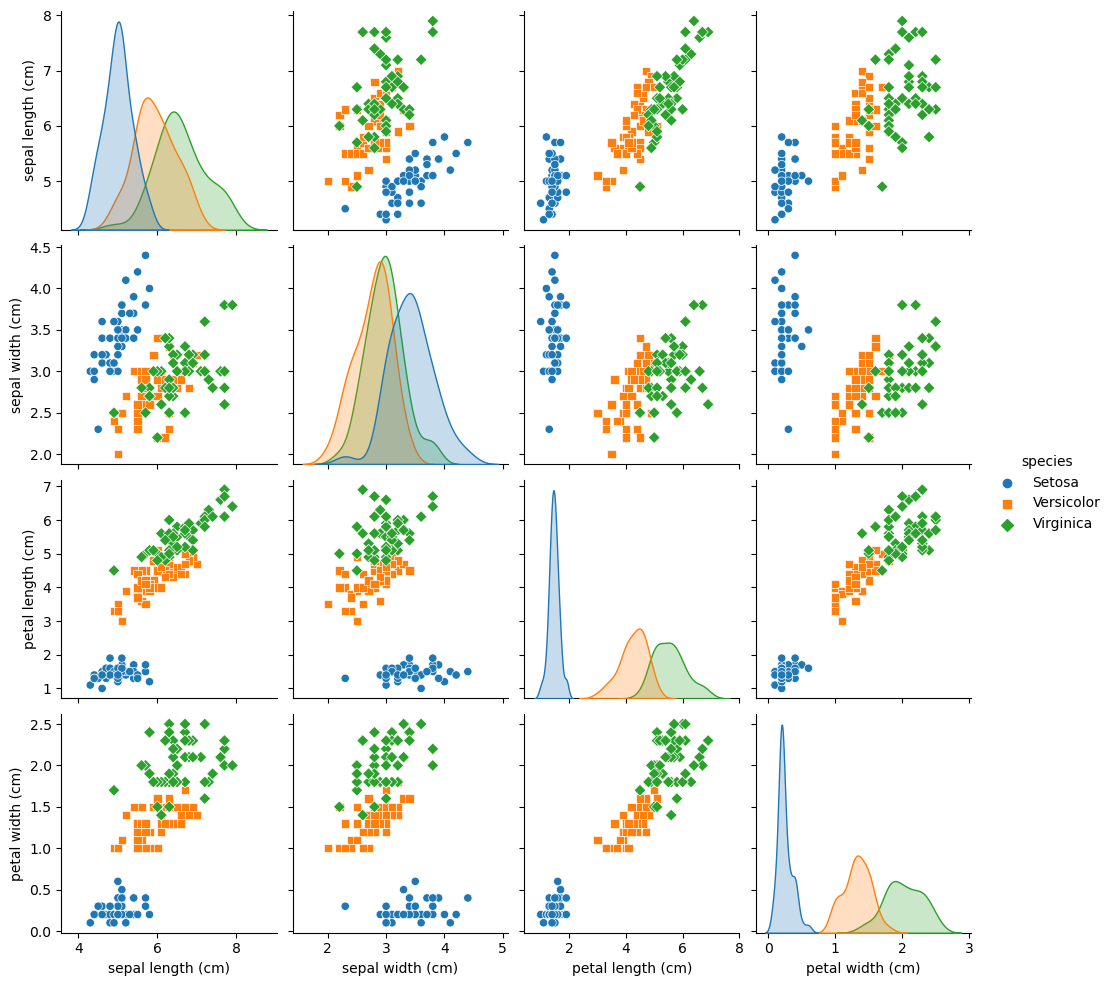

In [12]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()

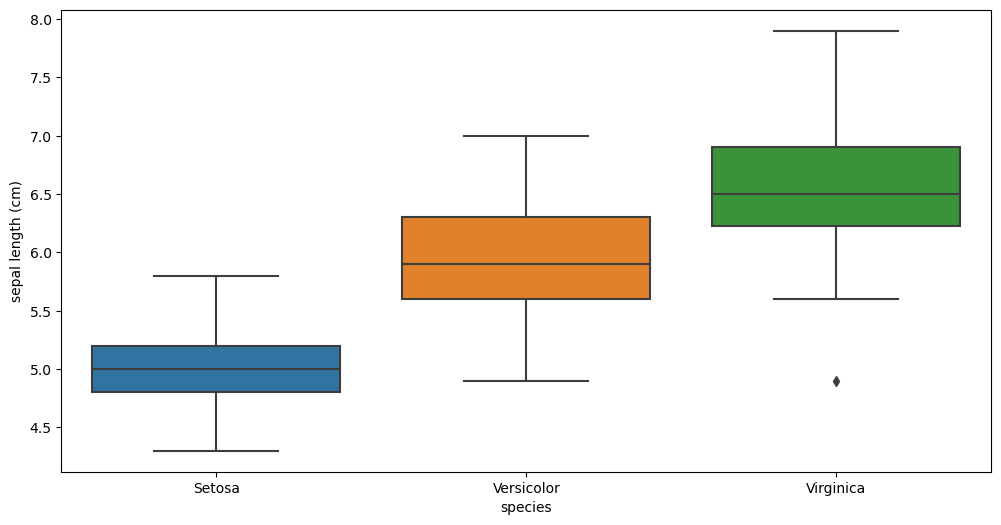

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species', y='sepal length (cm)')
plt.show()

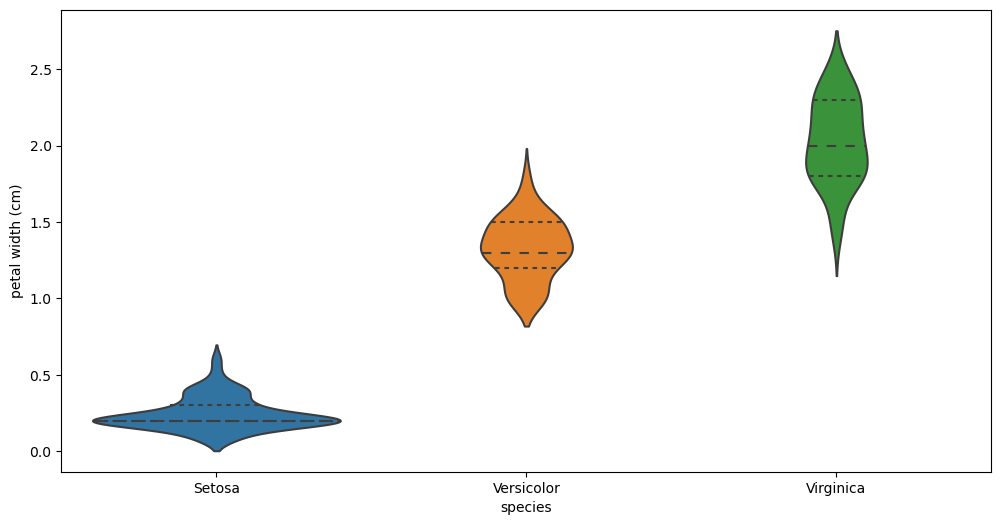

In [33]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='petal width (cm)', data=df, inner='quartile')
plt.show()

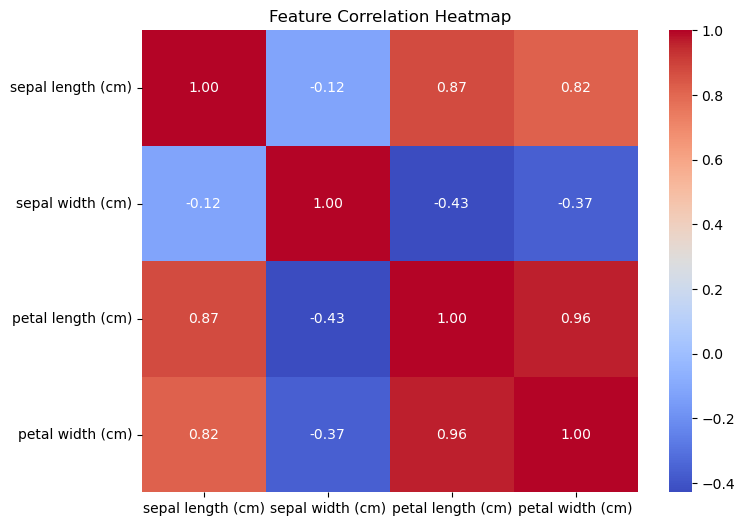

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

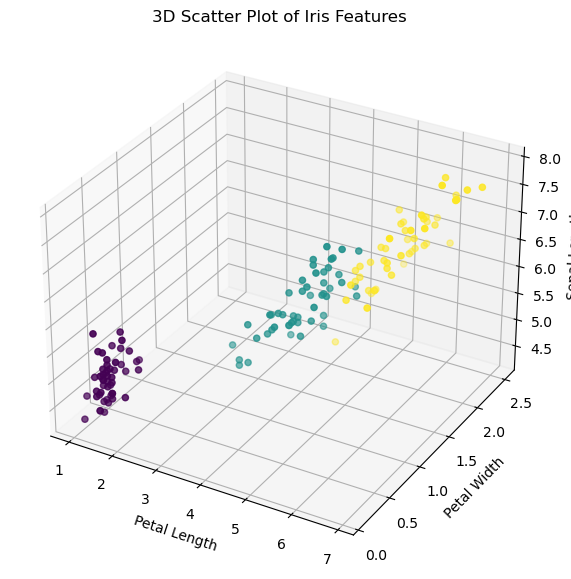

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df["petal length (cm)"], df["petal width (cm)"], df["sepal length (cm)"], c=pd.factorize(df["species"])[0], cmap='viridis')

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_zlabel("Sepal Length")
plt.title("3D Scatter Plot of Iris Features")
plt.show()

### Data Preprocessing

In [14]:
X = df.drop('species', axis=1)
y=df['species']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [18]:
scaler=StandardScaler()

In [19]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [20]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [22]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
ypred=model.predict(x_test)

In [25]:
accuaracy=accuracy_score(y_test,ypred)

In [26]:
print(accuaracy)

0.9666666666666667


In [28]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



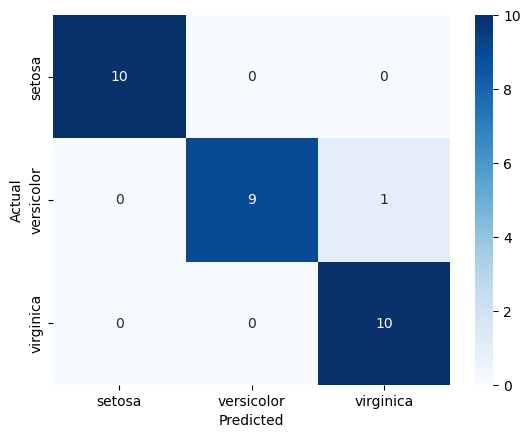

In [30]:
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
joblib.dump(model, "iris_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [39]:
from flask import Flask, request, jsonify